<a href="https://colab.research.google.com/github/Muneeb2k1/DEP/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
train = pd.read_csv("/content/twitter_training.csv", header=None)
validation = pd.read_csv("/content/twitter_validation.csv")
train.columns = ['id', 'information', 'type', 'text']
validation.columns = ['id', 'information', 'type', 'text']

train['lower'] = train['text'].astype(str).str.lower().apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))
validation['lower'] = validation['text'].astype(str).str.lower().apply(lambda x: re.sub(r'[^A-Za-z0-9 ]+', '', x))

train['text_length'] = train['lower'].apply(len)
validation['text_length'] = validation['lower'].apply(len)

display(train.head())
display(validation.head())

,id,information,type,text,lower,text_length
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...,52
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...,50
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all,49
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...,50
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...,56


,id,information,type,text,lower,text_length
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claim...,100
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it functi...,87
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...,68
3,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...,163
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive had madeleine mccann in my cella...,261


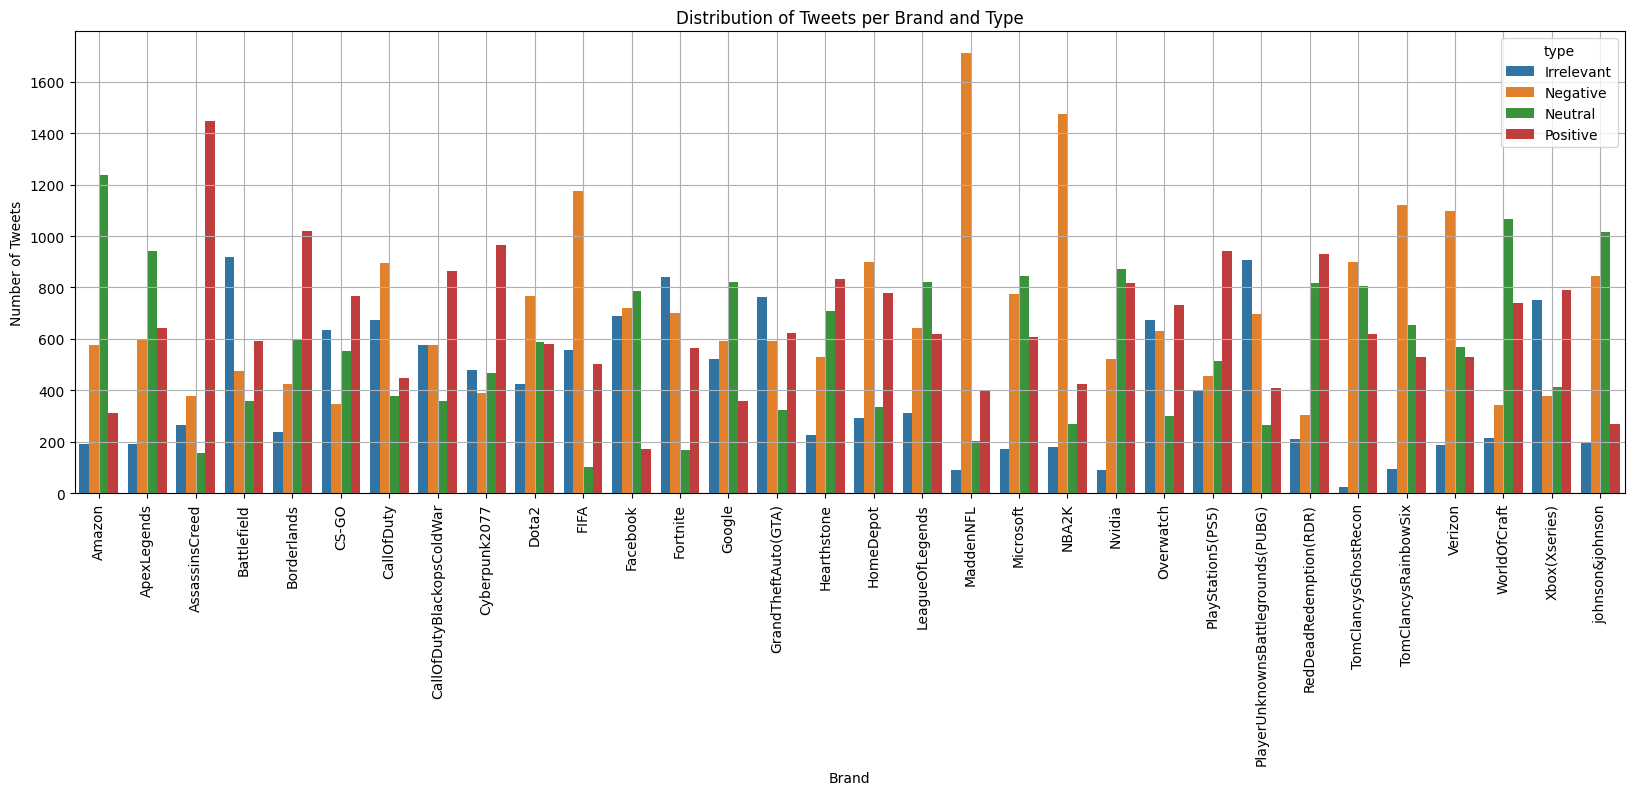

In [55]:
info_type = train.groupby(by=['information', 'type']).count().reset_index()
plt.figure(figsize=(20, 6))
sns.barplot(data=info_type, x='information', y='id', hue='type')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.grid()
plt.title('Distribution of Tweets per Brand and Type')
plt.show()

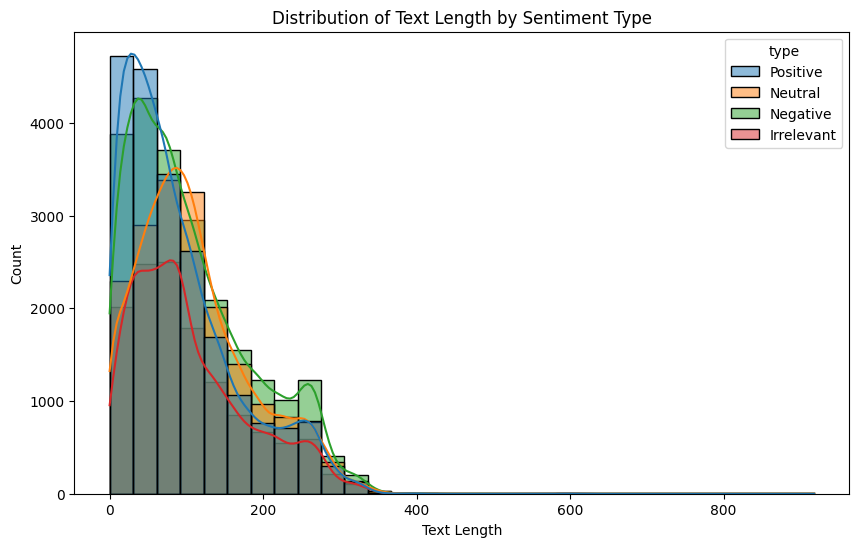

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='text_length', hue='type', bins=30, kde=True)
plt.xlabel('Text Length')
plt.title('Distribution of Text Length by Sentiment Type')
plt.show()

In [57]:
stop_words = list(stopwords.words('english'))
bow_counts = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, ngram_range=(1, 1))

In [58]:
reviews_train, reviews_test = train_test_split(train, test_size=0.2, random_state=42)

X_train_bow = bow_counts.fit_transform(reviews_train['lower'])
X_test_bow = bow_counts.transform(reviews_test['lower'])

y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

logistic_reg = LogisticRegression(C=1, solver="liblinear", max_iter=200)
logistic_reg.fit(X_train_bow, y_train_bow)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=1, max_iter=200, solver='liblinear')

In [59]:
test_pred = logistic_reg.predict(X_test_bow)
print("Test Accuracy:", accuracy_score(y_test_bow, test_pred))

Test Accuracy: 0.7983530829483833


In [60]:
print("Unique classes in y_test_bow:", set(y_test_bow))
print("Unique classes in y_pred:", set(test_pred))

Unique classes in y_test_bow: {'Neutral', 'Negative', 'Irrelevant', 'Positive'}
Unique classes in y_pred: {'Neutral', 'Negative', 'Irrelevant', 'Positive'}


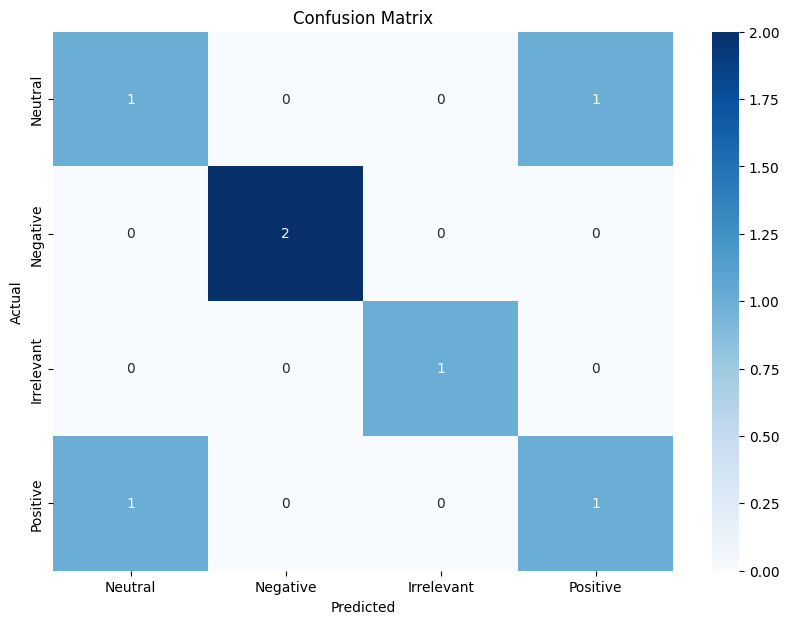

In [61]:
y_true = np.array(['Neutral', 'Negative', 'Positive', 'Neutral', 'Irrelevant', 'Positive', 'Negative'])
y_pred = np.array(['Neutral', 'Negative', 'Positive', 'Positive', 'Irrelevant', 'Neutral', 'Negative'])

labels = ['Neutral', 'Negative', 'Irrelevant', 'Positive']
cm = confusion_matrix(y_true, y_pred, labels=labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
X_val_bow = bow_counts.transform(validation['lower'])
y_val_bow = validation['type']

val_res = logistic_reg.predict(X_val_bow)
print("Validation Accuracy:", accuracy_score(y_val_bow, val_res))

Validation Accuracy: 0.9079079079079079
